In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wall(thickness, start, end, t_or_b, resolution):
    """Generates the straight part of the cell wall's coordinates (all but the poles)

    Parameters
    ----------
    thickness : float
        The distance from the top cell wall to the bottom cell wall
    start : float
        The start coordinate of the cell wall
    end : float
        The end coordinate of the cell wall
    t_or_b: int
        0 for top wall
        1 for bottom wall
    resolution : int
        Number of points defining the cell wall geometry
    Returns
    -------
    2-tuple of 1D numpy arrays
        return[0] is the wall's x coordinates
        return[0] is the wall's y coordiantes
        
    Example
    -------
    Create two cell walls of length 10, 3 apart
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> top_wall = wall(3,0,10,0,20)
    >>> bottom_wall = top_wall = wall(3,0,10,1,20)
    >>> plt.plot(walls[0], walls[1])
    >>> plt.plot(walls[0], walls[1])
    >>> plt.show()
    """
    wall_x = np.linspace(start, end, resolution)
    wall_y = np.ones(resolution)*thickness * t_or_b +thickness
    return wall_x, wall_y

In [3]:
def circ(theta, start, radius):
    y = radius * np.cos(theta) +radius
    x = radius * np.sin(theta) + start + radius
    return x, y

def centroid(vertices):
    """Return the centroid of a list of vertices 
    
    Keyword arguments:
    vertices -- A list of tuples containing x,y coordinates.

    """
    return np.sum(vertices,axis=0)/len(vertices)

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy


In [4]:
def get_vertices(cell_length, cell_width, angle, resolution):
    """Generates coordinates for a cell centered aronud (0,0)

    Parameters
    ----------
    cell_length : float
        The length of the STRAIGHT part of the cell's wall. 
        Total length is cell_length + cell_width because the poles are models as semi-circles.
    cell_width : float
        Total thickness of the cell, defines the poles too.
    angle : float
        Angle in radians to rotate the cell by (counter-clockwise)
    resolution : int
        Number of points defining the cell wall geometry
    Returns
    -------
    list of lists containing cell x and y coords
    
    Example
    -------
    Create a cell of length 10+4 rotated by 1 radian with a resolution of 20:
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> verts = get_vertices(10,4,1,20)
    >>> verts_y = [y[0] for y in verts]
    >>> verts_x = [x[1] for x in verts]
    >>> plt.plot(verts_x,verts_y)
    """
    cell_width = cell_width/2
    left_wall = circ(np.linspace(np.pi,2*np.pi, resolution), 0, cell_width)
    top_wall_xy = wall(cell_width, cell_width, cell_length, 1, resolution)
    bottom_wall_xy = wall(cell_width, cell_width, cell_length, -1, resolution)
    right_wall = circ(np.linspace(0,np.pi, resolution), cell_length - cell_width, cell_width)
    coordinates = [[left_wall[0][x] - cell_length/2, left_wall[1][x] - cell_width/2] for x in reversed(range(len(left_wall[0])))] + \
            [[bottom_wall_xy[0][x] - cell_length/2, bottom_wall_xy[1][x]- cell_width/2] for x in (range(len(bottom_wall_xy[0])))] + \
            [[right_wall[0][x] - cell_length/2, right_wall[1][x]- cell_width/2] for x in reversed(range(len(right_wall[0])))] + \
            [[top_wall_xy[0][x] - cell_length/2, top_wall_xy[1][x]- cell_width/2] for x in reversed(range(len(top_wall_xy[0])))]
    coordinates = np.array(coordinates)
    cell_centroid = centroid(coordinates)
    centered_verts = coordinates - cell_centroid
    centered_verts = centered_verts.tolist()

    rotated = np.zeros((len(centered_verts),2))
    for x in range(len(centered_verts)):
        rotated[x] = rotate(cell_centroid, (centered_verts[x][0],centered_verts[x][1]), angle)
    centered_verts = rotated - centroid(rotated)

    return centered_verts.tolist()

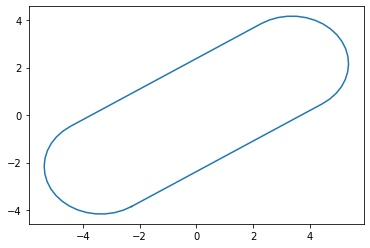

In [5]:
verts = get_vertices(10,4,1,20)
verts_y = [y[0] for y in verts]
verts_x = [x[1] for x in verts]
plt.plot(verts_x,verts_y)

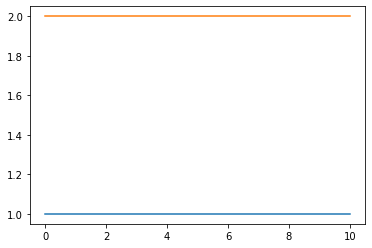

In [6]:
walls = wall(1,0,10,0,5)
plt.plot(walls[0], walls[1])
walls = wall(1,0,10,1,5)

plt.plot(walls[0], walls[1])

In [7]:
import pymunk

In [8]:
space = pymunk.Space()

In [10]:
type(space)

pymunk.space.Space

In [11]:
b = pymunk.Body()

In [12]:
type(b)

pymunk.body.Body

In [14]:
pymunk.Circle(b, 10)